## Importing Liabraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preprocessing

In [4]:
# read the .csv file 
df = pd.read_csv('zomato.csv')
df[:3]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


#### Data information about the restaurant ratting in Bengaluru city
##### 1.url :  Restaurants url link of zomato website
##### 2.address : Specific restaurants address in bengaluru
##### 3.name : Particular restaurant names
##### 4.online_order : In that restaurant have online order facility or not
##### 5.book_table : We can online order the booking table or not
##### 6.rate : Ratting of the restaurant out of the 5
##### 7.votes : Number of person giving the ratting on restaurant
##### 8.phone : Phone number of the restaurant 
##### 9.location : Base location of the restaurant
##### 10.rest_type : Is this the what the restaurant type
##### 11.dish_liked : What is special in the restaurant and customer liked dish
##### 12.cuisines : What kind of cuisines are in restaurant
##### 13.approx_cost(for two people) : Approxmate price of the two persons order item.
##### 14.reviews_list : Gives ratting and why they are giving review for reason also
##### 15.menu_item : The restaurant contain the list of menu
##### 16.listed_in(type) : Menu surving type
##### 17.listed_in(city) : Location of the this type of restaurant

In [5]:
df.shape

(51717, 17)

In [6]:
# we have hug data 51717 rows and 17 columns
# some columns have unueval names so we are going to change the name of columns
# approx_cost(for two people)

df = df.rename(columns = {'approx_cost(for two people)':'cost'})
df[:2]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [7]:
# Here the some column are no need, we are going to drop those columns directly
# url, address, phone, dish_liked, reviews_list, city

data = df.drop(['url', 'address', 'phone', 'dish_liked','reviews_list','listed_in(type)','listed_in(city)'],axis = 1)

In [8]:
data[:2]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[]
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[]


### checking the missing values

In [9]:
data.isnull().sum()  # lets drop the null values directly

name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cuisines          45
cost             346
menu_item          0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum() # so no null values


name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
menu_item       0
dtype: int64

In [12]:
data.shape

(43533, 10)

In [13]:
data[:3]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[]
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[]
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[]


In [14]:
#lets check the datatypes
data.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
menu_item       object
dtype: object

In [15]:
# Here some column are categorical information so they are objective type
# but some column are numerical value and showing objective type we need to change into numerical format

In [16]:
data.rate.unique()
#lets clean the each values ti remove the '/5' 
# and there is one value is 'NEW' and '-' so first remove that
# and rate column in object type and this also convert into float format
# rate, cost columns

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
data = data.loc[df['rate'] != 'NEW']
data = data.loc[df['rate'] != '-']
data['rate'] = data['rate'].apply(lambda x : x.replace('/5', ''))
data['rate'] = data['rate'].astype(float)
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
data.cost.unique()
# cost column in object so we need to do convert into float datatype
# here the some value have '1,250' like this so we are remove that comma on middle

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [19]:
data['cost'] = data['cost'].apply(lambda x: x.replace(',',''))
data['cost'] = data['cost'].astype(float)

In [20]:
data.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

## value_counts()

In [21]:
data.online_order.value_counts()
# online orders having restaurants most 28202 and 15331 restaurant are dont have online orders

Yes    27102
No     14161
Name: online_order, dtype: int64

In [22]:
data.book_table.value_counts()
# booking table in online avaliable in 37100 and 6433 restaurant don't have booking tables

No     34959
Yes     6304
Name: book_table, dtype: int64

In [23]:
data.location.value_counts()
# 92 different types of restaurant location are in bengaluru

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

In [24]:
data.rest_type.value_counts()
# 87 types of restaurant type are in bengaluru

Quick Bites                  13885
Casual Dining                 9614
Cafe                          3369
Dessert Parlor                1850
Delivery                      1667
                             ...  
Food Court, Beverage Shop        2
Bakery, Food Court               2
Dessert Parlor, Kiosk            2
Quick Bites, Kiosk               1
Bakery, Beverage Shop            1
Name: rest_type, Length: 87, dtype: int64

## Exploration Data Analysis

In [25]:
data[:2]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[]
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[]


In [26]:
outlet = data['name'].value_counts()[:15]
outlet

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Five Star Chicken    68
Kanti Sweets         68
Just Bake            67
Baskin Robbins       62
KFC                  60
Pizza Hut            60
Petoo                60
Subway               59
McDonald's           59
Domino's Pizza       59
Smoor                59
Polar Bear           58
Name: name, dtype: int64

c:\users\shiva\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'no of outlets')

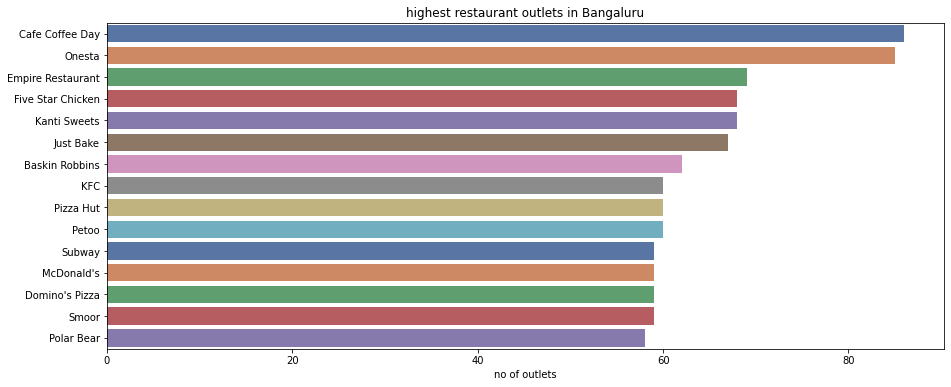

In [27]:
#lets plotling the outlets
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(outlet,outlet.index,palette='deep')
plt.title('highest restaurant outlets in Bangaluru')
plt.xlabel('no of outlets')

##### observation:the highest outlets in restaurants are Cafe Coffee Day, Onesta, Empire Restaurant.

In [28]:
x = data.online_order.value_counts()
x  # in bangaluru 28202 restaurant are having online order fecilities, remaining 15331 restaurant are not this fecility
# and 15331 restaurant are connected with zomato app 

Yes    27102
No     14161
Name: online_order, dtype: int64

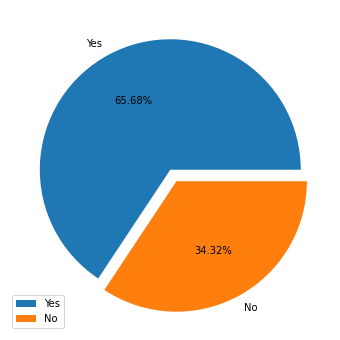

In [29]:
#lets pie chart
plt.figure(figsize=(15,6))
plt.pie(x,explode=[0,0.1],labels=x.index,autopct='%0.2f%%')
plt.legend()
plt.show()

#### in the above graph is 65.68% of data is restaurant are having online orders and remaining 34.32% have not online ordered restaurants

In [30]:
x = data['book_table'].value_counts()
x   # 37100 restaurants are not providing the tables booking and 6433 restaurant are accept the table booking fecility

No     34959
Yes     6304
Name: book_table, dtype: int64

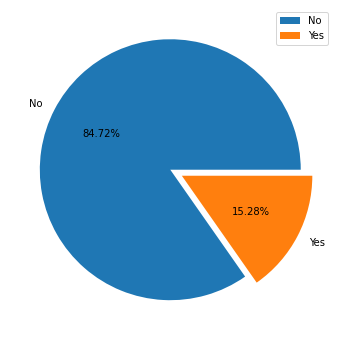

In [31]:
# lets pie chart
plt.figure(figsize=(15,6))
plt.pie(x,explode=[0,0.1],labels=x.index,autopct='%0.2f%%')
plt.legend()

#### in the above graph is 84.72% of data is restaurant are having table booking orders and remaining 15.28% have not table bookin ordered restaurants

c:\users\shiva\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

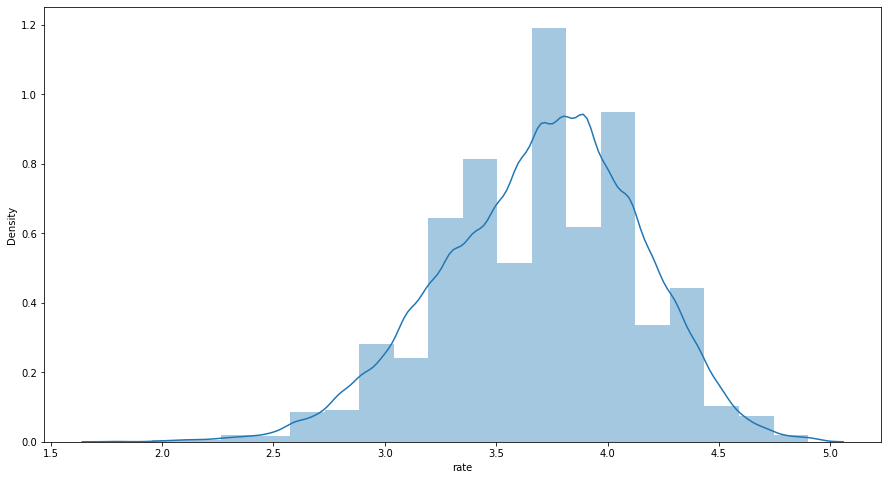

In [32]:
#lets we using distibuted plot in ratting column

plt.figure(figsize=(15,8))

sns.distplot(data.rate,bins=20,kde=True)

### observation : distibution plot is showing 3.5 to 4.0 ratting restaurant hug density

In [33]:
data.cost.value_counts().iloc[:10]

400.0     5265
300.0     5250
500.0     4081
600.0     3189
200.0     3164
250.0     2124
800.0     2079
700.0     1818
1000.0    1515
350.0     1351
Name: cost, dtype: int64

c:\users\shiva\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

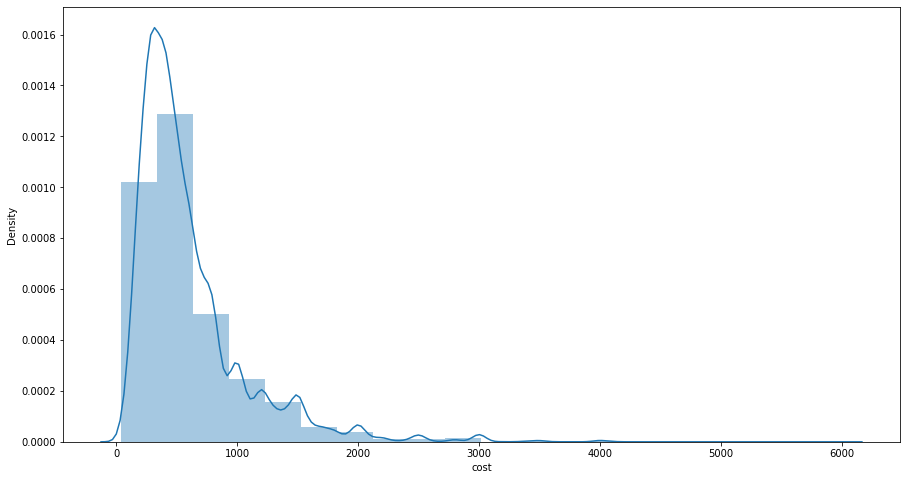

In [34]:
#lets we using distibuted plot in cost column

plt.figure(figsize=(15,8))

sns.distplot(data.cost,bins=20,kde=True)

### observation : cost of most of restaurant are for two person nearly 200 to 800 Rupess 

In [35]:
rest = data.rest_type.value_counts().iloc[:20]
rest

Quick Bites                   13885
Casual Dining                  9614
Cafe                           3369
Dessert Parlor                 1850
Delivery                       1667
Takeaway, Delivery             1279
Casual Dining, Bar             1092
Bakery                          704
Beverage Shop                   640
Bar                             640
Food Court                      498
Bar, Casual Dining              385
Lounge                          381
Pub                             352
Sweet Shop                      346
Fine Dining                     343
Casual Dining, Cafe             310
Beverage Shop, Quick Bites      239
Pub, Casual Dining              236
Bakery, Quick Bites             225
Name: rest_type, dtype: int64

c:\users\shiva\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'no of restaurants')

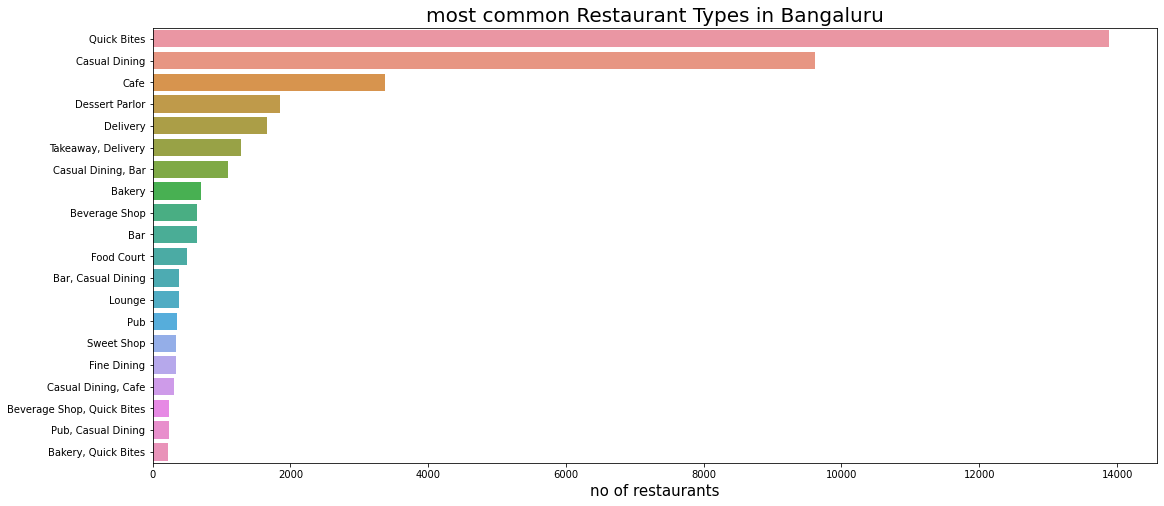

In [36]:
plt.figure(figsize=(18,8))
sns.barplot(rest,rest.index )
plt.title('most common Restaurant Types in Bangaluru',size=20)
plt.xlabel('no of restaurants',size=15)

### observation : this are the 20 most common restaurant types in bangaluru. top is Quick Bites are in nearly 20000 restaurants

In [37]:
cuisine = data.cuisines.value_counts().iloc[:10]

cuisine

North Indian                           2108
North Indian, Chinese                  1953
South Indian                           1232
Cafe                                    620
Bakery, Desserts                        613
Biryani                                 600
South Indian, North Indian, Chinese     561
Desserts                                545
Fast Food                               514
Chinese                                 410
Name: cuisines, dtype: int64

c:\users\shiva\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'no of restaurants')

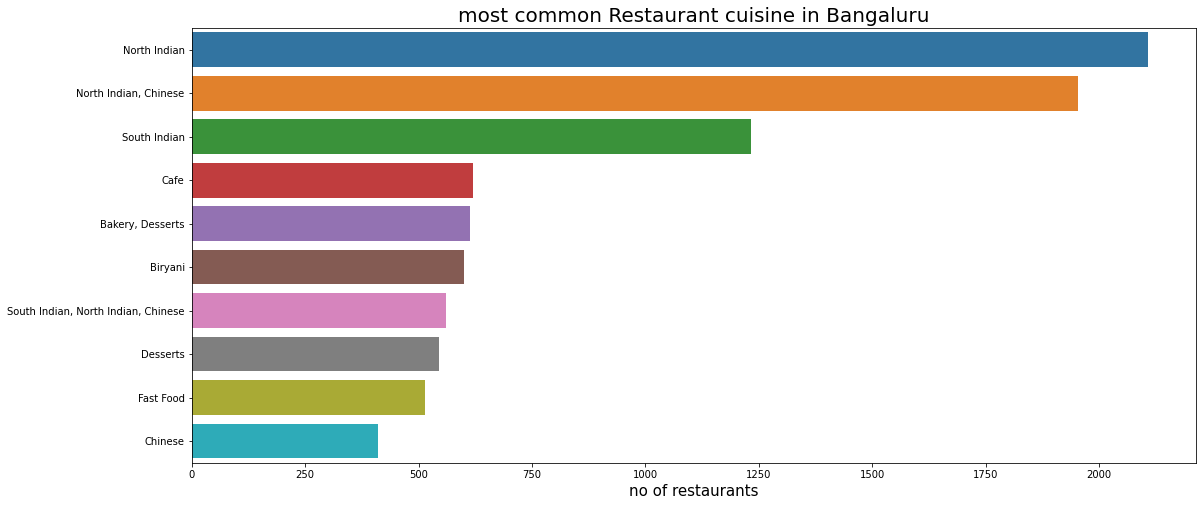

In [38]:
plt.figure(figsize=(18,8))
sns.barplot(cuisine,cuisine.index )
plt.title('most common Restaurant cuisine in Bangaluru',size=20)
plt.xlabel('no of restaurants',size=15)

### observation : North Indian cuisines are common for nearly 3000 restaurants.then South Indian cuisines are 2nd common for nearly 2400 restaurants. and top 10 cuisines are displaying.

In [39]:
data.location.value_counts()

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

Text(0.5, 1.0, 'location')

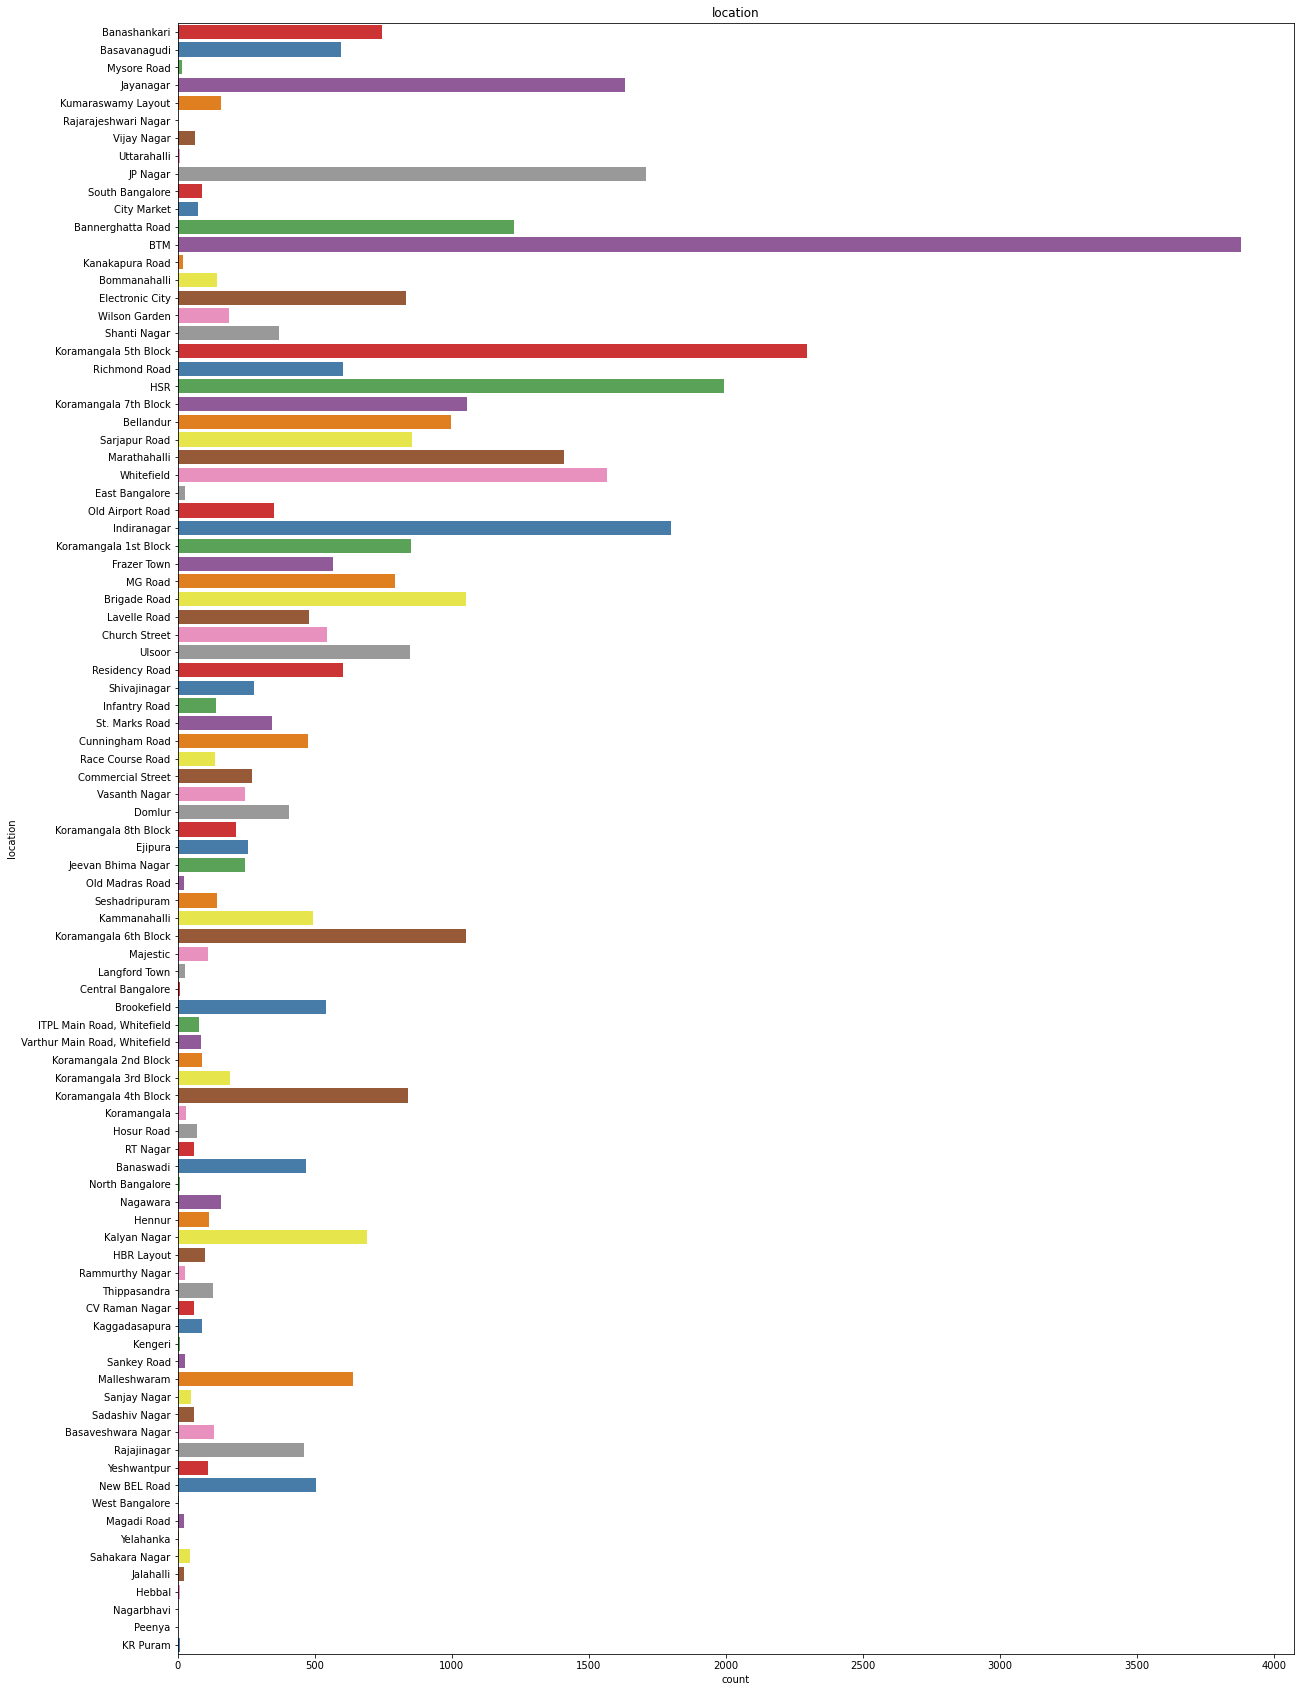

In [40]:
# 92 location in bangaluru so can draw all the locations
plt.figure(figsize = (20,30))
sns.countplot(y="location",data=data, palette = "Set1") 
plt.title('location')

In [41]:
data[:2]


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[]
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[]


In [42]:
data.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
cost            float64
menu_item        object
dtype: object

## using the LabelEncoder()

In [45]:
# LabelEncoder() in only ordinal data
# in the dataset having online_order,book_table

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['online_order'] = le.fit_transform(data['online_order'])
data['book_table'] = le.fit_transform(data['book_table'])
data[:2]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[]
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[]


### i want to change the objected columns are into numerical and the how many time the particular value repaited
### use to_dict() to create Dictonary of keys are names and values are no of repaited that name
### then using map to assign the converted values in particular column

In [46]:
len(data[data['name'] == 'Jalsa'])

11

In [47]:

# to_dict is just convrting DataFrame or series to dic
names = data.name.value_counts().to_dict()
names



{'Cafe Coffee Day': 86,
 'Onesta': 85,
 'Empire Restaurant': 69,
 'Five Star Chicken': 68,
 'Kanti Sweets': 68,
 'Just Bake': 67,
 'Baskin Robbins': 62,
 'KFC': 60,
 'Pizza Hut': 60,
 'Petoo': 60,
 'Subway': 59,
 "McDonald's": 59,
 "Domino's Pizza": 59,
 'Smoor': 59,
 'Polar Bear': 58,
 'Sweet Truth': 58,
 'Faasos': 56,
 'Beijing Bites': 56,
 'Burger King': 55,
 'Keventers': 54,
 "Smally's Resto Cafe": 54,
 'Corner House Ice Cream': 52,
 'Rolls On Wheels': 51,
 'Ambur Hot Dum Biryani': 51,
 'Frozen Bottle': 50,
 'Pizza Stop': 50,
 'A2B - Adyar Ananda Bhavan': 50,
 'Chung Wah': 50,
 'Lassi Shop': 49,
 'Tata Cha': 49,
 'California Burrito': 48,
 'Chai Point': 48,
 'Sweet Chariot': 48,
 "Mani's Dum Biryani": 47,
 'eat.fit': 47,
 'Goli Vada Pav No. 1': 46,
 'Gelato Italiano': 46,
 'Lakeview Milkbar': 45,
 'Krispy Kreme': 45,
 'Mainland China': 45,
 'New Prashanth Hotel': 44,
 'Hammered': 44,
 'The French Loaf': 44,
 "Chef Baker's": 44,
 'Truffles': 43,
 'Oye Amritsar': 43,
 'Leon Grill': 4

In [48]:
data['name'] = data['name'].map(names)
data[:3]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,11,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[]
1,4,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[]
2,11,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[]


In [49]:
# do it same one remaining columns also
# location, rest_type, cuisines,menu_item
location_r = data.location.value_counts().to_dict()
data['location'] = data['location'].map(location_r)

rest_type_r = data.rest_type.value_counts().to_dict()
data['rest_type'] = data['rest_type'].map(rest_type_r)

cuisines_r = data.cuisines.value_counts().to_dict()
data['cuisines'] = data['cuisines'].map(cuisines_r)

menu_item_r = data['menu_item'].value_counts().to_dict()
data['menu_item'] = data['menu_item'].map(menu_item_r)

data[:3]


# all columns are in numerical values

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,11,1,1,4.1,775,744,9614,89,800.0,30336
1,4,1,0,4.1,787,744,9614,8,800.0,30336
2,11,1,0,3.8,918,744,173,11,800.0,30336


In [50]:
data.corr()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
name,1.000000,0.169917,0.033311,0.148093,0.169640,0.000617,-0.141639,-0.115020,0.023432,-0.120562
online_order,0.169917,1.000000,-0.054843,0.068970,-0.013357,0.092161,0.104861,-0.020415,-0.175665,-0.433828
book_table,0.033311,-0.054843,1.000000,0.426070,0.393186,-0.048281,-0.214683,-0.118232,0.614294,0.045710
rate,0.148093,0.068970,0.426070,1.000000,0.435256,-0.017551,-0.237442,-0.181516,0.385384,-0.056038
votes,0.169640,-0.013357,0.393186,0.435256,1.000000,0.006929,-0.176225,-0.109204,0.366556,0.003510
location,0.000617,0.092161,-0.048281,-0.017551,0.006929,1.000000,0.049465,0.008691,-0.113375,-0.079990
rest_type,-0.141639,0.104861,-0.214683,-0.237442,-0.176225,0.049465,1.000000,0.181608,-0.322556,-0.017170
cuisines,-0.115020,-0.020415,-0.118232,-0.181516,-0.109204,0.008691,0.181608,1.000000,-0.151270,0.040664
cost,0.023432,-0.175665,0.614294,0.385384,0.366556,-0.113375,-0.322556,-0.151270,1.000000,0.089971
menu_item,-0.120562,-0.433828,0.045710,-0.056038,0.003510,-0.079990,-0.017170,0.040664,0.089971,1.000000


<AxesSubplot:>

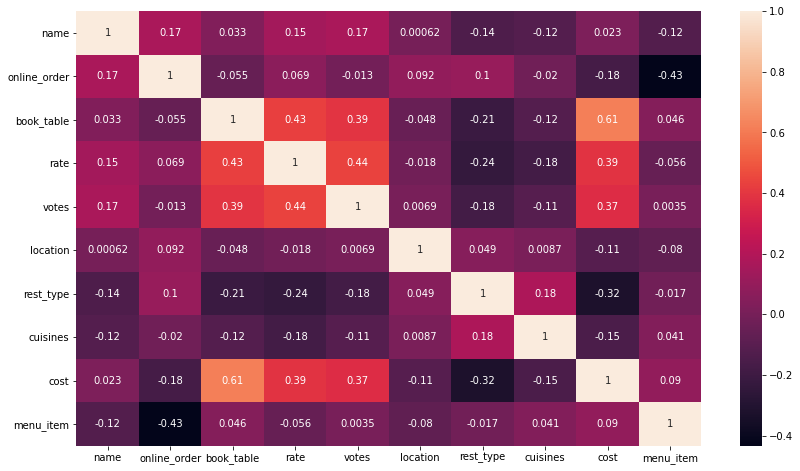

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,8))
sns.heatmap(data.corr(),annot=True)

### indentify indepedent and dependent variables

In [52]:
# divied the data into indepedent and dependent variables

x = data.drop(['rate'],axis=1)
y = data['rate']
x[:5],y[:5]

(   name  online_order  book_table  votes  location  rest_type  cuisines  \
 0    11             1           1    775       744       9614        89   
 1     4             1           0    787       744       9614         8   
 2    11             1           0    918       744        173        11   
 3     2             0           0     88       744      13885       220   
 4     4             0           0    166       595       9614         8   
 
     cost  menu_item  
 0  800.0      30336  
 1  800.0      30336  
 2  800.0      30336  
 3  300.0      30336  
 4  600.0      30336  ,
 0    4.1
 1    4.1
 2    3.8
 3    3.7
 4    3.8
 Name: rate, dtype: float64)

# splitting data into using train_test_split

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=False)
print(len(x_train))
print(len(x_test))


33010
8253


## Feature Scaling
The column are contain different values so we need to equalize the values

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Linear Regression


In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fitting the x_train and y_train values
lr.fit(x_train,y_train)

# prediction the test value
y_pred = lr.predict(x_test)

### r2_score 

In [56]:
from sklearn.metrics import r2_score
linear = r2_score(y_test,y_pred)
print(linear)

0.3154601790873077


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

# fitting the x_train and y_train values
dc.fit(x_train,y_train)

# prediction the test value
y_pred = dc.predict(x_test)

### r2_score

In [58]:
from sklearn.metrics import r2_score
decisiontree = r2_score(y_test,y_pred)
print(decisiontree)

0.9129787426376955


## Random Forest Tree

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40)

#fitting the trained values
rf.fit(x_train, y_train)

#predict the test values
y_pred = rf.predict(x_test)

### r2_score

In [60]:
from sklearn.metrics import r2_score
randomforest = r2_score(y_test,y_pred)
print(randomforest)

0.9411502548345301


## Extra Tree Regression

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=60)

#fitting the trained values
et.fit(x_train, y_train)

#predict the test values
y_pred = et.predict(x_test)

### r2_score

In [62]:
from sklearn.metrics import r2_score
extratree = r2_score(y_test,y_pred)
print(extratree)

0.9518531690264298


## Support Vector Machine

In [63]:
from sklearn.svm import SVR
svm = SVR()

#fitting the trained values
svm.fit(x_train, y_train)

#predict the test values
y_pred = svm.predict(x_test)

### r2_score

In [64]:
from sklearn.metrics import r2_score
supportvector= r2_score(y_test,y_pred)
print(supportvector)

0.4866293444996772


In [65]:
pd.DataFrame({'models':['Linear Regression','Decision Tree','Random Forest','Extra Tree Regression','Support Vector Machine'],
             'r2_score':[linear,decisiontree,randomforest,extratree,supportvector]})

,models,r2_score
0,Linear Regression,0.315460
1,Decision Tree,0.912979
2,Random Forest,0.941150
3,Extra Tree Regression,0.951853
4,Support Vector Machine,0.486629


### observation : compare to all regression algorithms Extra tree regression is good result and best accuracy scores
### best fit model is extratreeregression algorithm for given dataset as for train test split method

In [83]:
x_train[:2]

array([[-0.35132388,  0.72446682, -0.42474001, -0.19696368, -0.24112422,
        -0.72753072,  0.44593071, -0.00846387,  0.59650135],
       [ 0.29970443,  0.72446682, -0.42474001, -0.18688025, -0.78839878,
         1.1347648 , -0.2003733 , -0.22369882,  0.59650135]])

# splitting the data into cross_val_score

### directly fitting x,y values

In [66]:
import numpy as np
from sklearn.model_selection import cross_val_score


In [67]:
# linear Regression
from sklearn.linear_model import LinearRegression

linear = cross_val_score(LinearRegression(),x,y,cv = 5)   # nearly 33000 is divied into 5 folders
print(linear)
print('Linear Regression score:',np.average(linear))

[0.26306965 0.32094365 0.28504028 0.32888755 0.33938324]
Linear Regression score: 0.3074648754682536


In [68]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

decision = cross_val_score(DecisionTreeRegressor(),x,y,cv = 5)   
print(decision)
print('decisionTreeRegression score:',np.average(decision))

[0.76284184 0.73617328 0.70479337 0.91835832 0.74054345]
decisionTreeRegression score: 0.7725420533597596


In [69]:
# Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor

extra = cross_val_score(ExtraTreesRegressor(),x,y,cv = 5)   
print(extra)
print('ExtraTreeRegression score:',np.average(extra))

[0.88908024 0.86635038 0.85053768 0.96209617 0.86505272]
ExtraTreeRegression score: 0.8866234392453958


In [70]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

random = cross_val_score(RandomForestRegressor(),x,y,cv = 5)   
print(random)
print('RandomForest score:',np.average(random))

[0.88611755 0.8641994  0.84454833 0.95495226 0.85466638]
RandomForest score: 0.8808967825777039


In [72]:
# Support Vector Machine Regression
from sklearn.svm import SVR

svm = cross_val_score(SVR(),x,y,cv = 5)   
print(svm)
print('SupportVectorMachine score:',np.average(svm))

[0.25390874 0.32430311 0.30049055 0.3391403  0.33056836]
SupportVectorMachine score: 0.3096822110330641


In [73]:
pd.DataFrame({'models':['Linear Regression','Decision Tree','Random Forest','Extra Tree Regression','Support Vector Machine'],
             'r2_score':[np.average(linear),np.average(decision),np.average(random),np.average(extra),np.average(svm)]})

,models,r2_score
0,Linear Regression,0.307465
1,Decision Tree,0.772542
2,Random Forest,0.880897
3,Extra Tree Regression,0.886623
4,Support Vector Machine,0.309682


### observation : Random Forest and ExtraTree Regression both are get near best accuracy score on given dataset.
    

#### compare to train_test_split and cross_val_score same algorithm score values are different as like extra tree regression in tts - 95.3% and cvs - 88.7% 

## fitting scaled x,y values in cross_val_score
## using Pipeline 

### pipeline is the method to combined the scaller fitting and model fitting is single line comment

In [74]:

# linear regression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
lr = LinearRegression()

pipeline = Pipeline([('transformer',scaler),('estimator',lr)])
score_lr = cross_val_score(pipeline, x, y, cv = 5)

print(score_lr)
print('Linear Regression score:',np.average(score_lr))

[0.26306965 0.32094365 0.28504028 0.32888755 0.33938324]
Linear Regression score: 0.30746487546825385


In [75]:
# Decision tree regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dc = DecisionTreeRegressor()

pipeline = Pipeline([('transformer',scaler),('estimator',dc)])
score_dc = cross_val_score(pipeline, x, y, cv = 5)

print(score_dc)
print('Decision Tree Regression score:',np.average(score_dc))

[0.7639497  0.73960602 0.7086453  0.92716846 0.72661458]
Decision Tree Regression score: 0.7731968115213274


In [76]:
# Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
etr = ExtraTreesRegressor()

pipeline = Pipeline([('transformer',scaler),('estimator',etr)])
score_etr = cross_val_score(pipeline, x, y, cv = 5)

print(score_etr)
print('Extra Tree Regression score:',np.average(score_etr))

[0.89102593 0.86731028 0.85229237 0.96254711 0.86468126]
Extra Tree Regression score: 0.8875713906072257


In [77]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rf = RandomForestRegressor()

pipeline = Pipeline([('transformer',scaler),('estimator',rf)])
score_rf = cross_val_score(pipeline, x, y, cv = 5)

print(score_rf)
print('Random Forest Regression score:',np.average(score_rf))

[0.88440888 0.86670865 0.84433288 0.95585284 0.85577358]
Random Forest Regression score: 0.8814153666941174


In [79]:
# Support Vector Machine Regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
svm = SVR()

pipeline = Pipeline([('transformer',scaler),('estimator',svm)])
score_svm = cross_val_score(pipeline, x, y, cv = 5)

print(score_svm)
print('Support Vector Regression score:',np.average(score_svm))

In [80]:
pd.DataFrame({'models':['Linear Regression','Decision Tree','Random Forest','Extra Tree Regression','Support Vector Machine'],
             'r2_score':[np.average(score_lr),np.average(score_dc),np.average(score_rf),np.average(score_et),np.average(score_svm)]})

### observation : here also the same algorithm will gives the best accuracy ExtraTree Regression.accuracy percentage is comapre to tts and directly apply cvs and scaler cvs different.
### scaled train_test_split - 95.3%
### direcly cross_val_score - 88.6%
### scaled cross_val_score - 88.7%
    

## Serialization

In [82]:
import pickle
pickle.dump(et,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))